# Lead Scoring Case Study - Logistic Regression 


An education company named X Education sells online courses to industry professionals.. The company markets its courses on several websites and search engines like Google. . When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


## Bussiness Objective

X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company needs a model wherein a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Reading and Data Inspection

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [3]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

In [4]:
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Taking backup of the Original dataset
lead_orig = lead.copy()

In [6]:
# shape of the dataframe (no. of rows and columns)
lead.shape

(9240, 37)

In [7]:
# information about the dataframe (columns, counts, datatype)
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# describe on the dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Numerical columns
lead.describe().columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [10]:
# Categorical columns
list(set(lead.columns) - set(lead.describe().columns))

['X Education Forums',
 'Update me on Supply Chain Content',
 'Lead Profile',
 'Specialization',
 'Magazine',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'What matters most to you in choosing a course',
 'Tags',
 'Asymmetrique Activity Index',
 'Do Not Email',
 'Newspaper Article',
 'I agree to pay the amount through cheque',
 'Prospect ID',
 'Get updates on DM Content',
 'Search',
 'Lead Quality',
 'Last Notable Activity',
 'Country',
 'Receive More Updates About Our Courses',
 'What is your current occupation',
 'Lead Source',
 'Newspaper',
 'Asymmetrique Profile Index',
 'Digital Advertisement',
 'Do Not Call',
 'City',
 'Last Activity',
 'Lead Origin',
 'How did you hear about X Education']

In [11]:
#data types of the columns
lead.dtypes.value_counts()

object     30
float64     4
int64       3
dtype: int64

In [12]:
# Get the aggregate value like, count, size and No of different values for each column
lead.agg(['count','size','nunique'])

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9204,9240,9240,9240,9103,9240,9103,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022,5022,9240,9240,9240
size,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
nunique,9240,9240,5,21,2,2,2,41,1731,114,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,12,10,1,2,16


On looking at the unique features on the columns. There are lot of columns with only 1 feature and 2 feature. 

In [13]:
# Nullvalue % on the columns
((lead.isnull().sum()[lead.isnull().sum() > 0]/len(lead)).round(4) * 100).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Activity Score                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

In [14]:
# Duplicate check
sum(lead.duplicated())

0

There are in total 9240 records with 37 columns in the Lead Dataset. There are lots of missing and null values in the dataset. Also it contains the records with the mix of integer, float and object datatype. There are no duplicate values in the dataset

## Data Cleaning and Exploratory Data Analysis

### Data Validation

In [15]:
sum(lead.duplicated(subset = 'Prospect ID')) == 0

True

In [16]:
sum(lead.duplicated(subset = 'Lead Number')) == 0

True

Both "Prospect ID" and "Lead Number" seems to be the ID column without any duplicate values, we can have anyone of the column for tracking. So let us drop Prospect ID and retain Lead Number.

In [17]:
drop_list = []
drop_list.append('Prospect ID')

### Drop the columns which has more than 45% of null data

In [18]:
null_col = ((lead.isnull().sum()[lead.isnull().sum() > 0]/len(lead)).round(4) * 100).sort_values(ascending=False)
null_lst = null_col[null_col> 45].index.tolist()
null_lst

['Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Asymmetrique Activity Score']

In [19]:
# Let us view the count of each features of the columns
for col in null_lst:
    print('Column :', col,', Data Type : ', lead[col].dtype)
    if lead[col].dtype == 'object':
        print( lead[col].value_counts(dropna=False), '\n')
    else:
        print( lead[col].describe(), '\n')

Column : Lead Quality , Data Type :  object
NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64 

Column : Asymmetrique Profile Score , Data Type :  float64
count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64 

Column : Asymmetrique Profile Index , Data Type :  object
NaN          4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64 

Column : Asymmetrique Activity Index , Data Type :  object
NaN          4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64 

Column : Asymmetrique Activity Score , Data Type :  float64
count    5022.000000
mean       14.306252
std         1.386694
min 

In [20]:
# Adding the columns which are having 45% null values to the drop list
drop_list.extend(null_lst)
drop_list

['Prospect ID',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Asymmetrique Activity Score']

The other null valued columns will be treated when we are performing Univariate Analysis on Individual Column 

### Analysis of columns with only 1 feature

In [21]:
one_val_col = []

for col in list(lead.columns):
    if lead[col].unique().size == 1:
        one_val_col.append(col)
        
print(one_val_col) 

['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [22]:
for col in one_val_col:
    print('Column :', col,', Data Type : ', lead[col].dtype)
    if lead[col].dtype == 'object':
        print( lead[col].value_counts(dropna=False), '\n')
    else:
        print( lead[col].describe(), '\n')

Column : Magazine , Data Type :  object
No    9240
Name: Magazine, dtype: int64 

Column : Receive More Updates About Our Courses , Data Type :  object
No    9240
Name: Receive More Updates About Our Courses, dtype: int64 

Column : Update me on Supply Chain Content , Data Type :  object
No    9240
Name: Update me on Supply Chain Content, dtype: int64 

Column : Get updates on DM Content , Data Type :  object
No    9240
Name: Get updates on DM Content, dtype: int64 

Column : I agree to pay the amount through cheque , Data Type :  object
No    9240
Name: I agree to pay the amount through cheque, dtype: int64 



Let us add these columns to the drop list as it has only "Nos" in it will not provide any significance to our model building. 

In [23]:
# Adding the columns to the drop list
drop_list.extend(one_val_col)
drop_list

['Prospect ID',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Asymmetrique Activity Score',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

### Analysis of binary value column

In [24]:
bin_val_col = []

for col in list(lead.columns):
    if (lead[col].unique().size == 2) & (lead[col].dtype == 'object'):
        bin_val_col.append(col)
        
print(bin_val_col)

['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


In [25]:
for col in bin_val_col:
    print('Column :', col,', Data Type : ', lead[col].dtype)
    if lead[col].dtype == 'object':
        print( lead[col].value_counts(normalize=False), '\n')
    else:
        print( lead[col].describe(), '\n')

Column : Do Not Email , Data Type :  object
No     8506
Yes     734
Name: Do Not Email, dtype: int64 

Column : Do Not Call , Data Type :  object
No     9238
Yes       2
Name: Do Not Call, dtype: int64 

Column : Search , Data Type :  object
No     9226
Yes      14
Name: Search, dtype: int64 

Column : Newspaper Article , Data Type :  object
No     9238
Yes       2
Name: Newspaper Article, dtype: int64 

Column : X Education Forums , Data Type :  object
No     9239
Yes       1
Name: X Education Forums, dtype: int64 

Column : Newspaper , Data Type :  object
No     9239
Yes       1
Name: Newspaper, dtype: int64 

Column : Digital Advertisement , Data Type :  object
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64 

Column : Through Recommendations , Data Type :  object
No     9233
Yes       7
Name: Through Recommendations, dtype: int64 

Column : A free copy of Mastering The Interview , Data Type :  object
No     6352
Yes    2888
Name: A free copy of Mastering The Inter

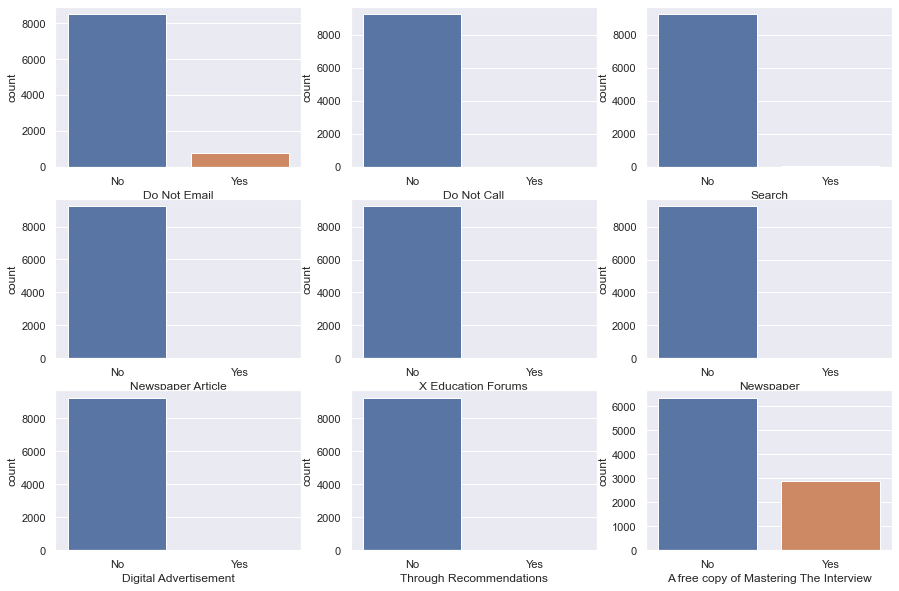

In [26]:
cnt=0
plt.figure(figsize=(15,10))
for i in bin_val_col:
    plt.subplot(3,3,cnt+1)
    sns.countplot(lead[i])
    cnt = cnt+1
plt.show()

Almost all the columns are having "No" percentage as ~99% except the two columns "A free copy of Mastering The Interview", "Do Not Email". The columns which are having more percentage of "No"s can be dropped as these columns will also act as individual value contributers and will not provide any significance to our model building. 

In [27]:
bin_val_col.remove("A free copy of Mastering The Interview")
bin_val_col.remove("Do Not Email")
bin_val_col

['Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [28]:
# Adding the columns to the drop list
drop_list.extend(bin_val_col)
drop_list

['Prospect ID',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Asymmetrique Activity Score',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

### Conversion of binary values columns to numeric values (0s and 1s)

In [29]:
conlist =  ["A free copy of Mastering The Interview","Do Not Email"]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[conlist] = lead[conlist].apply(binary_map)

In [30]:
for col in conlist:
    print('Column :', col,', Data Type : ', lead[col].dtype)
    print( lead[col].value_counts(normalize=False), '\n')


Column : A free copy of Mastering The Interview , Data Type :  int64
0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64 

Column : Do Not Email , Data Type :  int64
0    8506
1     734
Name: Do Not Email, dtype: int64 



### Outlier Analysis for numerical columns

In [31]:
lead.describe().columns

Index(['Lead Number', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview'],
      dtype='object')

For Outlier treatment we are considering only the three columns as others are already in the drop list or Binary valued column

In [32]:
out_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [33]:
lead[out_cols].isnull().sum()

TotalVisits                    137
Total Time Spent on Website      0
Page Views Per Visit           137
dtype: int64

There are null values in the columns 'Page Views Per Visit' and 'TotalVisits'. We need to impute the values with Median

In [34]:
lead[out_cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.0,0,0.0
1,5.0,674,2.5
2,2.0,1532,2.0
3,1.0,305,1.0
4,2.0,1428,1.0


In [35]:
lead[out_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


##### Impute the Null values with Median

In [36]:
imp_numcol=['Page Views Per Visit','TotalVisits']
for col in imp_numcol:
    lead.loc[(lead[col].isnull()==True),  col] = lead[col].median()

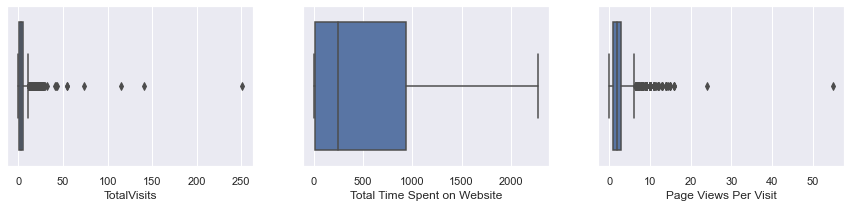

In [37]:
plt.figure(figsize=(15,10))
for i in enumerate(out_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =lead)
plt.show()

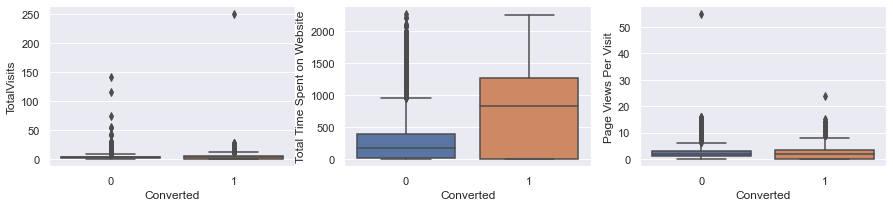

In [38]:
plt.figure(figsize=(15,10))
for i in enumerate(out_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = 'Converted', y = i[1], data =lead)
plt.show()

The columns 'TotalVisits' and 'Page Views Per Visit' are having outliers so we need to cap them with using 99%-1% quantile range

In [39]:
# Cap the outliers for the Numeric features at 0.01 and 0.99

cap_cols = ['TotalVisits', 'Page Views Per Visit']

for i, col in enumerate(cap_cols):
    q1 = lead[col].quantile(0.01)
    q4 = lead[col].quantile(0.99)
    lead[col][lead[col]<=q1] = q1
    lead[col][lead[col]>=q4] = q4

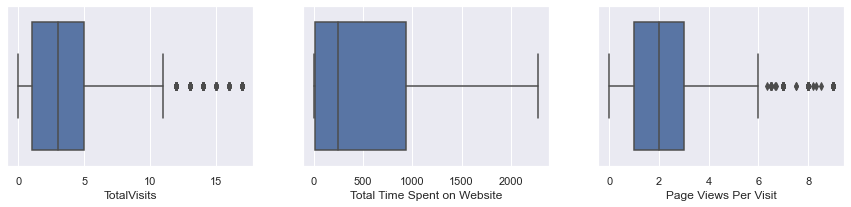

In [40]:
plt.figure(figsize=(15,10))
for i in enumerate(out_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =lead)
plt.show()

In [41]:
lead[out_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.327814,487.698268,2.329050
std,3.228466,548.021466,1.971347
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,17.000000,2272.000000,9.000000


### Data Visualization of categorical columns

#### Lead Origin

In [42]:
lead['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

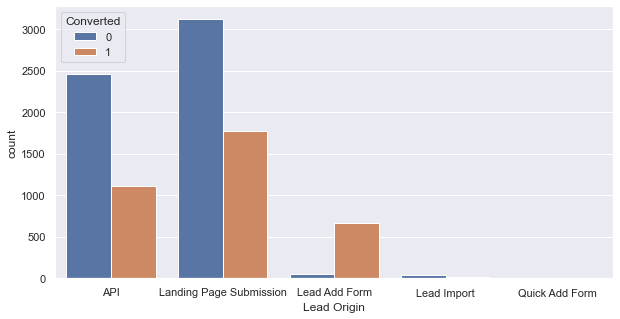

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead)
plt.show()

There are more number of leads from Landing Page Submission, API and Lead Add Form Lead Origin where in Lead Add Form Lead Origin the conversion rate is more when compared to other two main categories.

#### Lead Source

In [44]:
lead['Lead Source'].isnull().sum()

36

In [45]:
lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
testone                 1
youtubechannel          1
NC_EDM                  1
WeLearn                 1
blog                    1
welearnblog_Home        1
Name: Lead Source, dtype: int64

##### Impute the Null value with Mode

In [46]:
lead.loc[(lead['Lead Source'].isnull()==True),  'Lead Source'] = lead['Lead Source'].mode()[0]

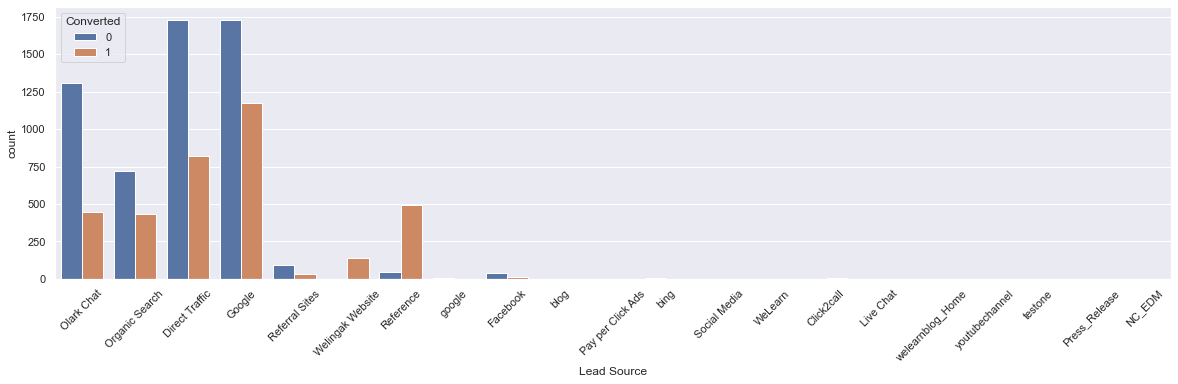

In [47]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

The right side of the chart doesnot provide any insight so let us merge the columns as "Others"

###### Replace the features having single digit count as Others

In [48]:
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')

In [49]:
ls_cnt = lead['Lead Source'].value_counts()
ls_lst = ls_cnt[ls_cnt < 10].index.tolist()
ls_lst

['bing',
 'Click2call',
 'Social Media',
 'Live Chat',
 'Press_Release',
 'Pay per Click Ads',
 'testone',
 'youtubechannel',
 'NC_EDM',
 'WeLearn',
 'blog',
 'welearnblog_Home']

In [50]:
lead['Lead Source'] = lead['Lead Source'].replace(ls_lst, 'Others')

In [51]:
lead['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

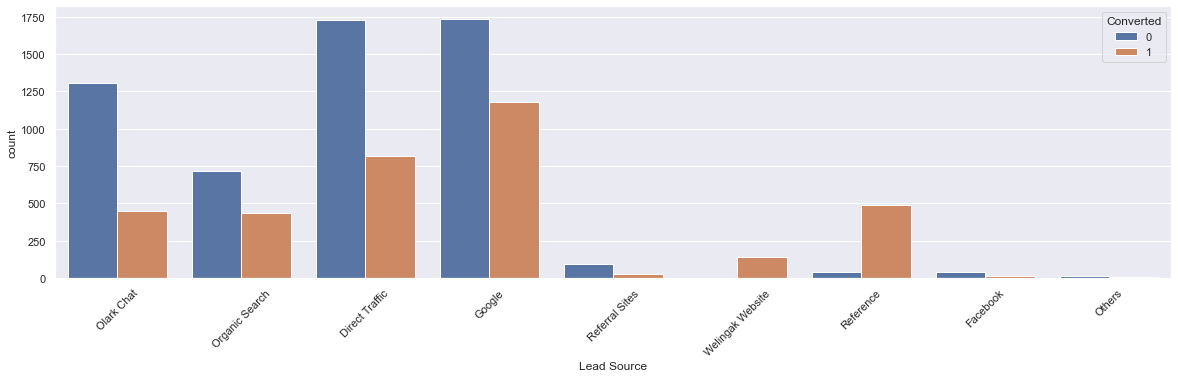

In [52]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

There are more number of leads from Google, Direct Traffic, Olark Chat, Organic Search, Reference where in for the sources Welingak Website and Reference the conversion rate is more when compared to other sources.

#### Last Activity

In [53]:
lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

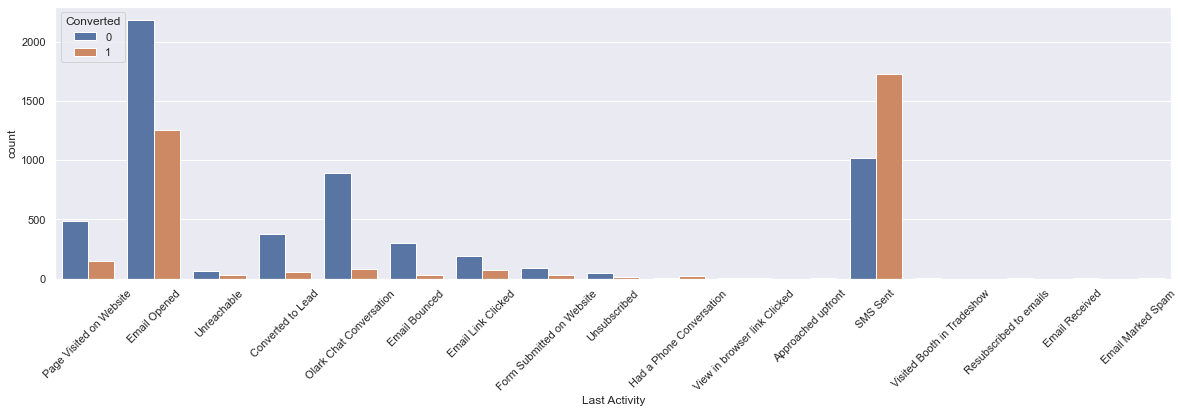

In [54]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

The right side of the chart doesnot provide any insight. Also the feature value seems to be entered by the Sales team so this column can be added to the drop list

In [55]:
drop_list.append('Last Activity')
drop_list

['Prospect ID',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Asymmetrique Activity Score',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Last Activity']

#### Country

In [56]:
lead['Country'].isnull().sum()

2461

In [57]:
lead['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Kuwait                     4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Uganda                     2
Netherlands                2
Philippines                2
China                      2
Belgium                    2
Bangladesh                 2
Italy                      2
Ghana                      2
Asia/Pacific Region        2
Russia                     1
Vietnam                    1
Indonesia                  1
Liberia                    1
Tanzania                   1
Switzerland   

There are lots of Null values in the Country column. Imputing with Mode will not be good option so let us mark it as 'Unknown'

###### Replace the Null values with 'Unknown'

In [58]:
lead.loc[(lead['Country'].isnull()==True),  'Country'] = 'Unknown'

In [59]:
lead['Country'] = lead['Country'].replace(['unknown'], 'Unknown')


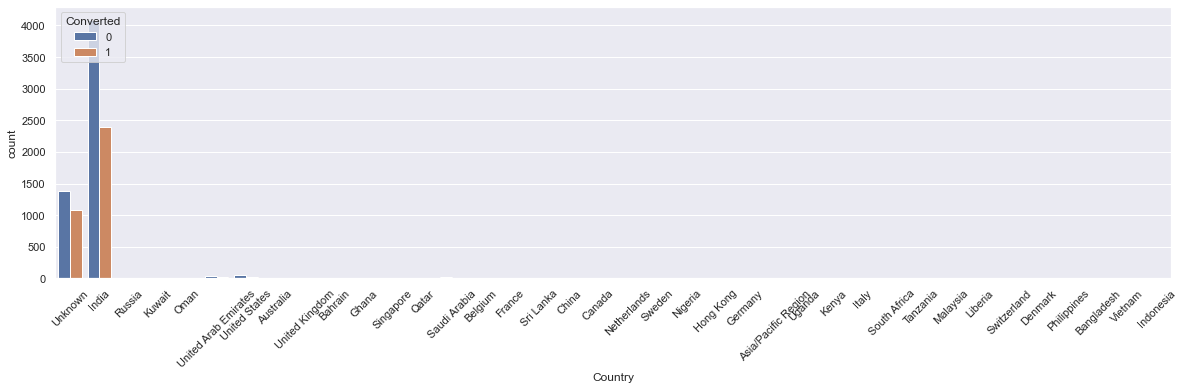

In [60]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "Country", hue = "Converted", data = lead)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

###### Replace the features having single digit count as 'Other Countries'

In [61]:
lc_cnt = lead['Country'].value_counts()
lc_lst = lc_cnt[lc_cnt < 10].index.tolist()
lc_lst

['Hong Kong',
 'Bahrain',
 'France',
 'Oman',
 'South Africa',
 'Kuwait',
 'Canada',
 'Nigeria',
 'Germany',
 'Sweden',
 'Uganda',
 'Netherlands',
 'Philippines',
 'China',
 'Belgium',
 'Bangladesh',
 'Asia/Pacific Region',
 'Italy',
 'Ghana',
 'Russia',
 'Vietnam',
 'Indonesia',
 'Liberia',
 'Tanzania',
 'Switzerland',
 'Malaysia',
 'Sri Lanka',
 'Kenya',
 'Denmark']

In [62]:
lead['Country'] = lead['Country'].replace(lc_lst, 'Other Countries')

In [63]:
lead['Country'].value_counts(dropna=False)

India                   6492
Unknown                 2466
Other Countries           77
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Name: Country, dtype: int64

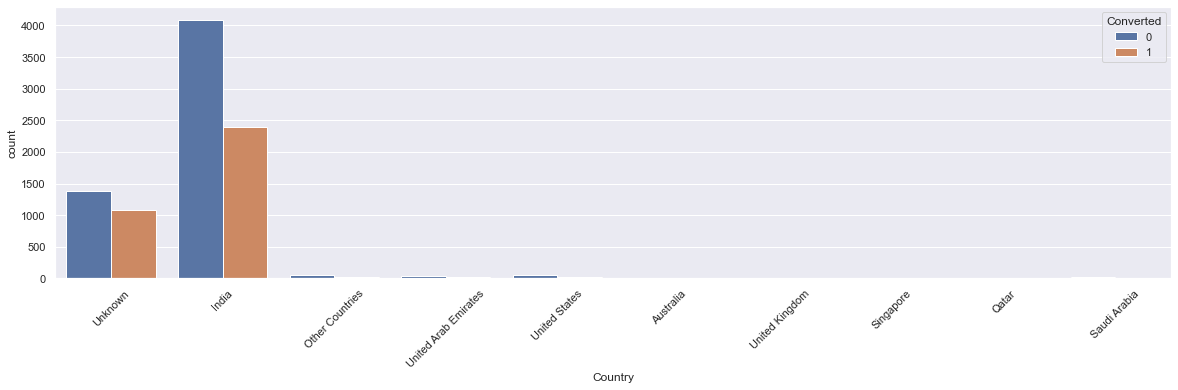

In [64]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "Country", hue = "Converted", data = lead)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

There are more number of leads from India

#### Specialization

In [65]:
lead['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

This column has both Null Value as Select in it. Select can also be considered as Null value. Imputing with Mode will not be good option so let us mark it as 'Unknown'

###### Replace the Null values and Select with 'Unknown'

In [66]:
lead.loc[(lead['Specialization'].isnull()==True),  'Specialization'] = 'Unknown'

In [67]:
lead['Specialization'] = lead['Specialization'].replace(['Select'], 'Unknown')

In [68]:
lead['Specialization'].value_counts(dropna=False)

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

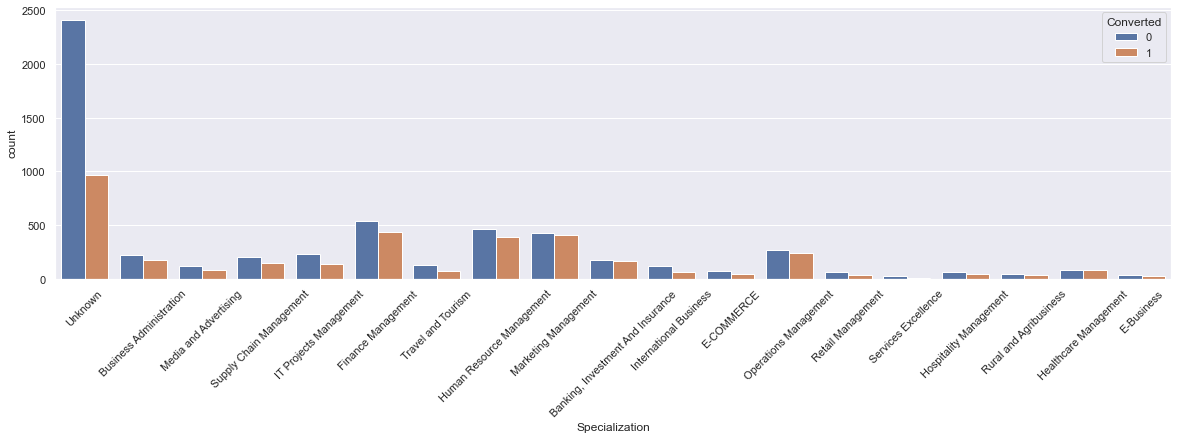

In [69]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "Specialization", hue = "Converted", data = lead)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

There are more number of leads from Finance Management, Human Resource Management, Marketing Management, Operations Management, Business Administration.

#### How did you hear about X Education

In [70]:
lead['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

This column has both Null Value as Select in it. Select can also be considered as Null value. Imputing with Mode will not be good option so let us mark it as 'Other'

##### Replace the Null values and Select with 'Other'

In [71]:
lead.loc[(lead['How did you hear about X Education'].isnull()==True),  'How did you hear about X Education'] = 'Other'

In [72]:
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].replace(['Select'], 'Other')

In [73]:
lead['How did you hear about X Education'].value_counts(dropna=False)

Other                    7436
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

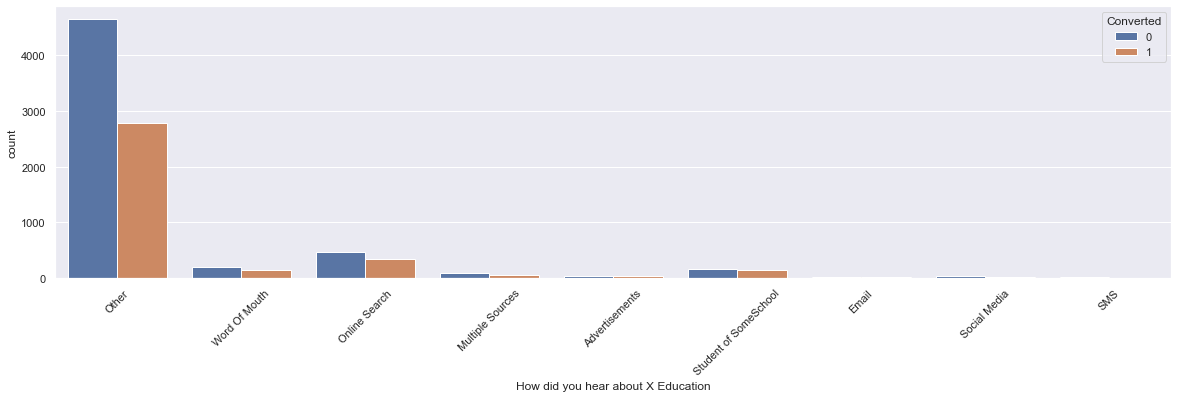

In [74]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "How did you hear about X Education", hue = "Converted", data = lead)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

There are more number of leads from Online Search, Word Of Mouth and Student of SomeSchool

#### What is your current occupation

In [75]:
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

This column has both Null Value as Select in it. Select can also be considered as Null value. Imputing with Mode will not be good option so let us mark it as 'Other'

##### Replace the Null values and Select with 'Other'

In [76]:
lead.loc[(lead['What is your current occupation'].isnull()==True),  'What is your current occupation'] = 'Other'

In [77]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(['Businessman'], 'Other')

In [78]:
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
Other                   2714
Working Professional     706
Student                  210
Housewife                 10
Name: What is your current occupation, dtype: int64

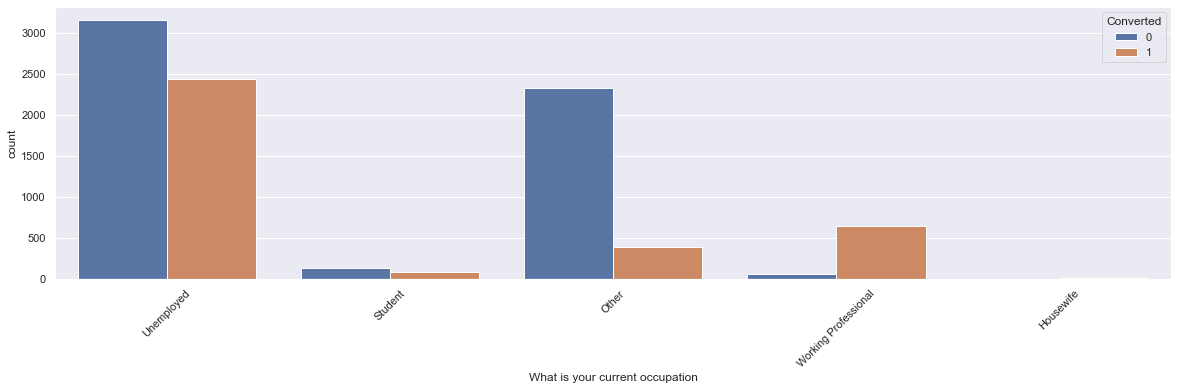

In [79]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

There are more leads from Unemployed, Working Professional occupation 

#### What matters most to you in choosing a course

In [80]:
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

This column has Null Values in it.Imputing with Mode will not be good option so let us mark it as 'Other'

##### Replace the Null values with 'Other'

In [81]:
lead.loc[(lead['What matters most to you in choosing a course'].isnull()==True),  'What matters most to you in choosing a course'] = 'Other'

##### Replace the features having single digit count as 'Other'

In [82]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(['Flexibility & Convenience'], 'Other')

In [83]:
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects    6528
Other                      2712
Name: What matters most to you in choosing a course, dtype: int64

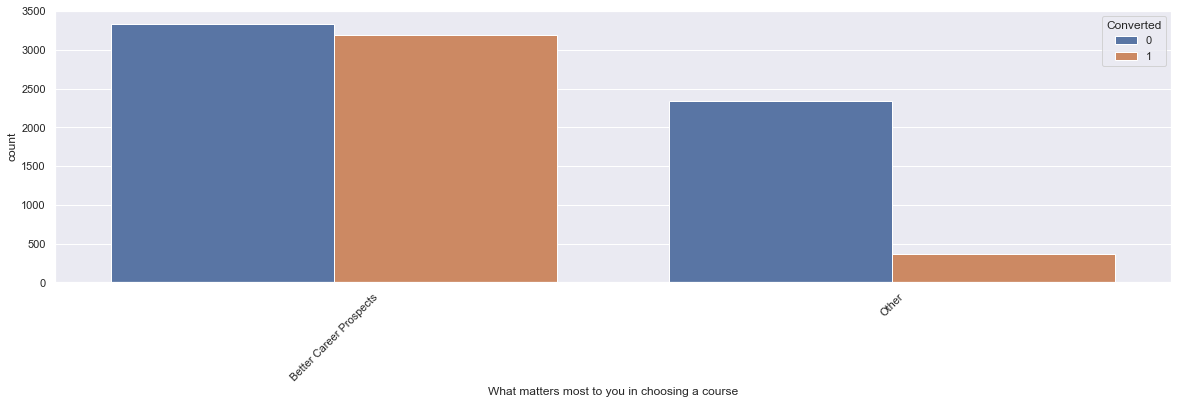

In [84]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lead)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

There are more leads for Better Career Prospects aspiration

#### Tags

In [85]:
lead['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

This column has Null Values in it.Imputing with Mode will not be good option so let us mark it as 'Other'

##### Replace the Null values with 'Unknown'

In [86]:
lead.loc[(lead['Tags'].isnull()==True),  'Tags'] = 'Unknown'

In [87]:
lead['Tags'].value_counts(dropna=False)

Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

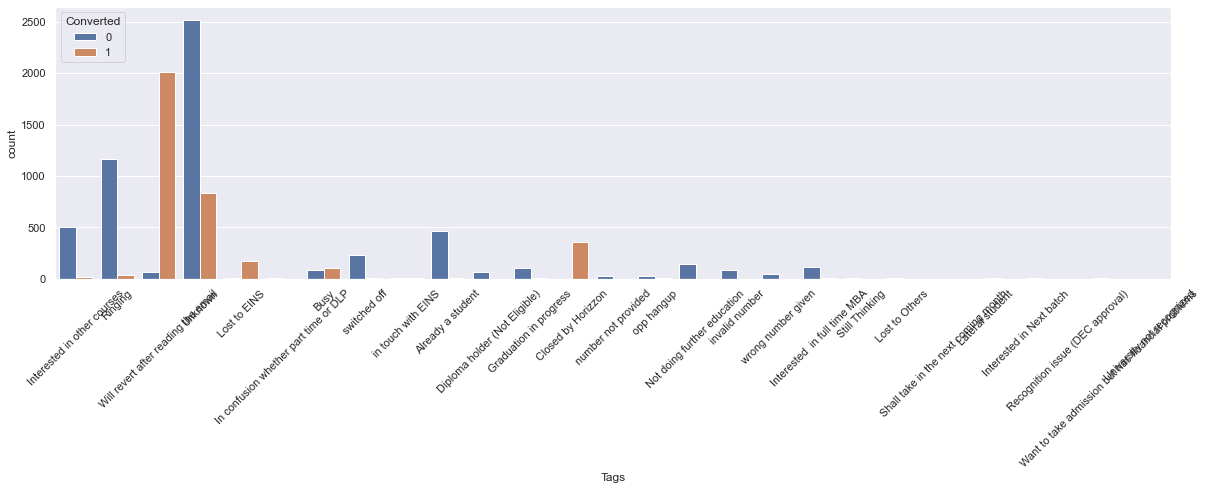

In [88]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "Tags", hue = "Converted", data = lead)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

The right side of the chart doesnot provide any insight. Also the feature value seems to be entered by the Sales team so this column can be added to the drop list

In [89]:
drop_list.append('Tags')
drop_list

['Prospect ID',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Asymmetrique Activity Score',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Last Activity',
 'Tags']

#### Lead Profile

In [90]:
lead['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

This column has both Null Value as Select in it. Select can also be considered as Null value. Imputing with Mode will not be good option so let us mark it as 'Other Leads'

###### Replace the Null values and Select with 'Other Leads'

In [91]:
lead.loc[(lead['Lead Profile'].isnull()==True),  'Lead Profile'] = 'Other Leads'

In [92]:
lead['Lead Profile'] = lead['Lead Profile'].replace(['Select'], 'Other Leads')

In [93]:
lead['Lead Profile'].value_counts(dropna=False)

Other Leads                    7342
Potential Lead                 1613
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

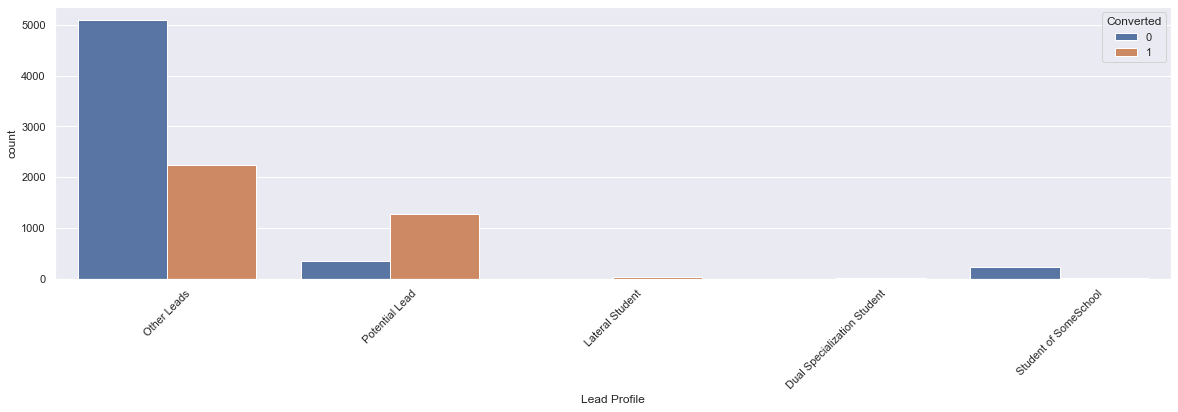

In [94]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "Lead Profile", hue = "Converted", data = lead)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

There are more number of leads from Potential Lead, Student of SomeSchool and in that Potential Lead get converted more than other profiles

#### City

In [95]:
lead['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

##### Replace the Null values and Select with 'Other Cities'

In [96]:
lead.loc[(lead['City'].isnull()==True),  'City'] = 'Other Cities'

In [97]:
lead['City'] = lead['City'].replace(['Select'], 'Other Cities')

In [98]:
lead['City'].value_counts(dropna=False)

Other Cities                   4355
Mumbai                         3222
Thane & Outskirts               752
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

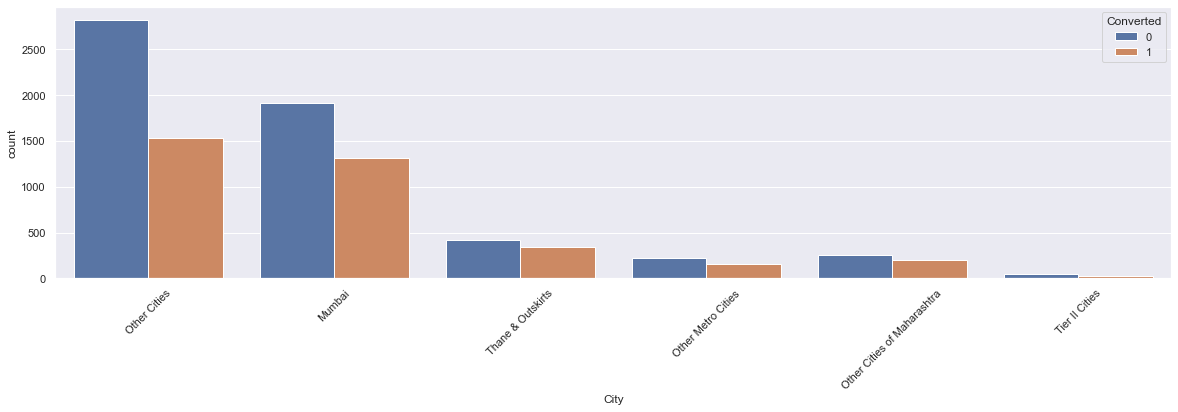

In [99]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "City", hue = "Converted", data = lead)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

There are more number of leads from Mumbai, Thane & Outskirts, Other Cities of Maharashtra

#### Last Notable Activity

In [100]:
lead['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

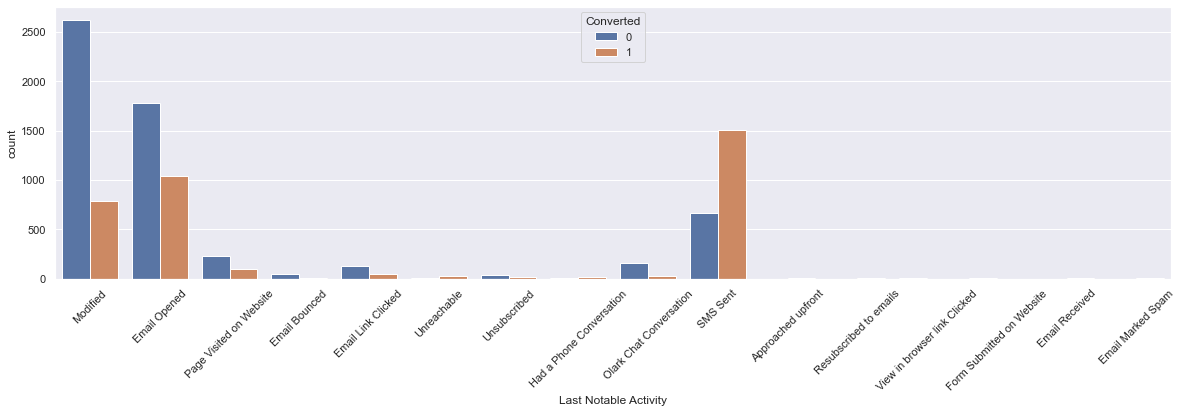

In [101]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

The right side of the chart doesnot provide any insight. Also the feature value seems to be entered by the Sales team so this column can be added to the drop list

In [102]:
drop_list.append('Last Notable Activity')
drop_list

['Prospect ID',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Asymmetrique Activity Score',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Last Activity',
 'Tags',
 'Last Notable Activity']

As we have analyzed all the individual columns let us the drop the columns in drop list from dataset

In [103]:
lead.drop(drop_list, axis=1,inplace=True)

In [104]:
lead.shape

(9240, 16)

#### Null value check

In [105]:
((lead.isnull().sum()[lead.isnull().sum() > 0]/len(lead)).round(4) * 100).sort_values(ascending=False)

Series([], dtype: float64)

The data is clean without having any null values

### Data Visualization of numerical columns

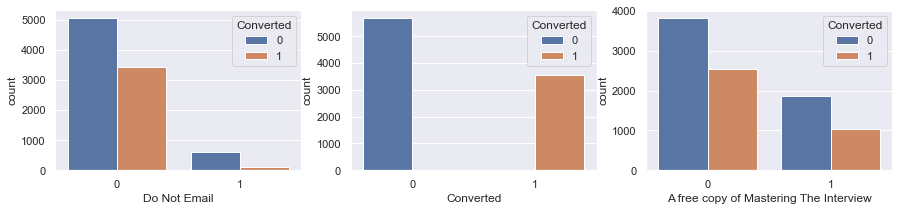

In [106]:
num_col = ['Do Not Email', 'Converted', 'A free copy of Mastering The Interview', ]

plt.figure(figsize=(15,10))
for i in enumerate(num_col):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(x = i[1], hue = "Converted", data =lead)
plt.show()

### Pairplot for numeric variables

<Figure size 1296x720 with 0 Axes>

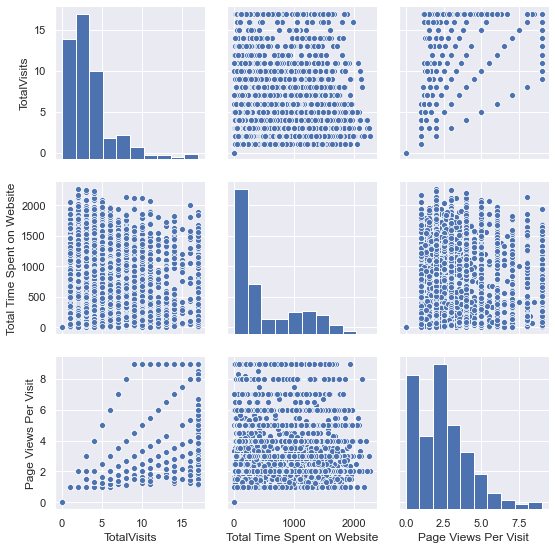

In [107]:
num_col1 = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize=(18,10))
sns.pairplot(lead[num_col1])
plt.show()

### Heat Map for analyzing Correlation between columns

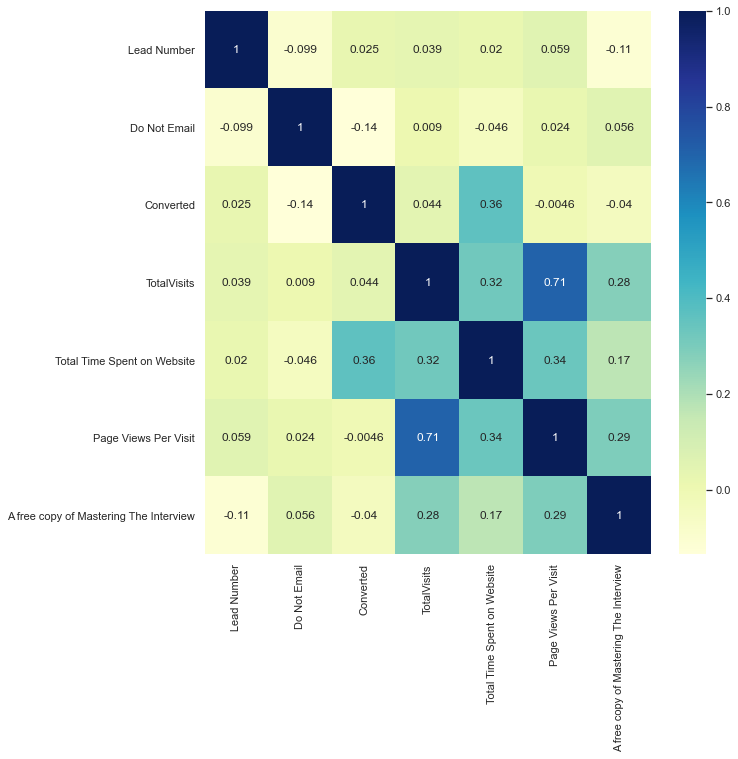

In [108]:
plt.figure(figsize = (10,10))        # Size of the figure
sns.heatmap(lead.corr(),cmap='YlGnBu', annot=True)
plt.show()

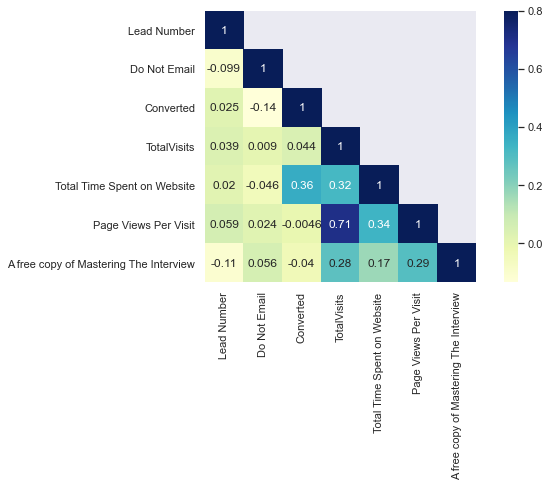

In [109]:
mask = np.array(lead.corr())
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(lead.corr(), mask=mask, vmax=0.8, square=True, annot=True,cmap='YlGnBu')
plt.show()

The Total Visit columns has positive correlation with Page Views Per Visit. So let us drop any one of the column.

In [110]:
lead.drop(['Page Views Per Visit'], axis=1,inplace=True)
lead.shape

(9240, 15)

In [111]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Country                                        9240 non-null   object 
 8   Specialization                                 9240 non-null   object 
 9   How did you hear about X Education             9240 

## Create dummy features using one-hot encoded

In [112]:
cat_col = list(set(lead.columns)-set(lead.describe().columns))

In [113]:
for i in cat_col:
    print('column ' , i, '\n',lead[i].value_counts(),'\n')

column  What matters most to you in choosing a course 
 Better Career Prospects    6528
Other                      2712
Name: What matters most to you in choosing a course, dtype: int64 

column  City 
 Other Cities                   4355
Mumbai                         3222
Thane & Outskirts               752
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64 

column  Lead Profile 
 Other Leads                    7342
Potential Lead                 1613
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64 

column  Specialization 
 Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                3

#### Creating dummy variables for the categorical variables and dropping the level with Unknown/Other/Least Significance

In [114]:
#Lead Source
lo = pd.get_dummies(lead['Lead Origin'], prefix='Lead Origin')
lo1 = lo.drop(['Lead Origin_Quick Add Form'], 1)

#Adding the results to the master dataframe
lead = pd.concat([lead,lo1], axis=1)

In [115]:
dum_col = []
dum_col.append('Lead Origin')

In [116]:
#Lead Source
ls = pd.get_dummies(lead['Lead Source'], prefix='Lead Source')
ls1 = ls.drop(['Lead Source_Others'], 1)

#Adding the results to the master dataframe
lead = pd.concat([lead,ls1], axis=1)


In [117]:
dum_col.append('Lead Source')

In [118]:
#Country
lc = pd.get_dummies(lead['Country'], prefix='Country')
lc1 = lc.drop(['Country_Unknown'], 1)

#Adding the results to the master dataframe
lead = pd.concat([lead,lc1], axis=1)

In [119]:
dum_col.append('Country')

In [120]:
#Specialization
lsp = pd.get_dummies(lead['Specialization'], prefix='Specialization')
lsp1 = lsp.drop(['Specialization_Unknown'], 1)

#Adding the results to the master dataframe
lead = pd.concat([lead,lsp1], axis=1)

In [121]:
dum_col.append('Specialization')

In [122]:
#How did you hear about X Education
he = pd.get_dummies(lead['How did you hear about X Education'], prefix='How did you hear about X Education')
he1 = he.drop(['How did you hear about X Education_Other'], 1)

#Adding the results to the master dataframe
lead = pd.concat([lead,he1], axis=1)

In [123]:
dum_col.append('How did you hear about X Education')

In [124]:
#What is your current occupation
wo = pd.get_dummies(lead['What is your current occupation'], prefix='What is your current occupation')
wo1 =wo.drop(['What is your current occupation_Other'], 1)

#Adding the results to the master dataframe
lead = pd.concat([lead,wo1], axis=1)

In [125]:
dum_col.append('What is your current occupation')

In [126]:
#What matters most to you in choosing a course
wc = pd.get_dummies(lead['What matters most to you in choosing a course'], prefix='What matters most to you in choosing a course')
wc1 =wc.drop(['What matters most to you in choosing a course_Other'], 1)

#Adding the results to the master dataframe
lead = pd.concat([lead,wc1], axis=1)

In [127]:
dum_col.append('What matters most to you in choosing a course')

In [128]:
#Lead Profile
lp = pd.get_dummies(lead['Lead Profile'], prefix='Lead Profile')
lp1 =lp.drop(['Lead Profile_Other Leads'], 1)

#Adding the results to the master dataframe
lead = pd.concat([lead,lp1], axis=1)

In [129]:
dum_col.append('Lead Profile')

In [130]:
#City
lcy = pd.get_dummies(lead['City'], prefix='City')
lcy1 =lcy.drop(['City_Other Cities'], 1)

#Adding the results to the master dataframe
lead = pd.concat([lead,lcy1], axis=1)

In [131]:
dum_col.append('City')
dum_col

['Lead Origin',
 'Lead Source',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Lead Profile',
 'City']

In [132]:
lead.shape

(9240, 76)

In [133]:
lead.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Country_Australia', 'Country_India', 'Country_Other Countries',
       'Country_Qatar', 'Country_Saudi Arabia', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States',
       'Special

#### Drop the main columns as dummies are created for it 

In [134]:
lead.drop(dum_col, axis=1,inplace=True)

In [135]:
lead.shape

(9240, 67)

In [136]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 67 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Lead Number                                                            9240 non-null   int64  
 1   Do Not Email                                                           9240 non-null   int64  
 2   Converted                                                              9240 non-null   int64  
 3   TotalVisits                                                            9240 non-null   float64
 4   Total Time Spent on Website                                            9240 non-null   int64  
 5   A free copy of Mastering The Interview                                 9240 non-null   int64  
 6   Lead Origin_API                                                        9240 non-null   u

### Lead Conversion Percentage

In [137]:
### Checking on the Conversion percentage
lead_conv = (sum(lead['Converted'])/len(lead['Converted'].index))*100
lead_conv

38.53896103896104

From the details from the dataset, 38.5 leads will get converted 

## Test-Train Split

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
# Putting feature variable to X
X = lead.drop(['Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Australia,Country_India,Country_Other Countries,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,0,5.0,674,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
3,0,1.0,305,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


In [140]:
# Putting response variable to y
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [141]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [142]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Australia,Country_India,Country_Other Countries,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1871,0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
6795,0,0.235294,0.214349,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3516,0,0.294118,0.046655,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
8105,0,0.294118,0.541373,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3934,0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


## Model Building

### Running the model on the Train dataset

In [143]:
import statsmodels.api as sm

In [144]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6402
Model Family:                Binomial   Df Model:                           65
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2678.8
Date:                Mon, 08 Mar 2021   Deviance:                       5357.6
Time:                        15:16:20   Pearson chi2:                 8.57e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    19.0082   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Do Not Email                                                             -1.1648      0.169     -6.908      0.000      -1.495      -0.834
TotalVisits                                                               0.7410      0.220      3.370      0.001       0.310       1.172
Total Time Spent on Website                                               4.5324      0.168     27.004      0.000       4.203       4.861
A free copy of Mastering The Interview                                   -0.0862      0.128     -0.676      0.499      -0.336       0.164
Lead Origin_API                                                         -21.2236   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Origin_Landing Page Submission                                     -21.7781   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Origin_Lead Add Form                                               -18.7917   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Origin_Lead Import                                                 -22.2369   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                                               -0.4211      0.703     -0.599      0.549      -1.799       0.956
Lead Source_Facebook                                                     -0.3215      2.751     -0.117      0.907      -5.713       5.070
Lead Source_Google                                                       -0.2051      0.699     -0.294      0.769      -1.575       1.165
Lead Source_Olark Chat                                                    0.1878      0.739      0.254      0.799      -1.261       1.637
Lead Source_Organic Search                                               -0.3672      0.705     -0.521      0.602      -1.748       1.014
Lead Source_Reference                                                    -0.2223      0.809     -0.275      0.784      -1.808       1.363
Lead Source_Referral Sites                                               -0.7601      0.764     -0.995      0.320      -2.257       0.737
Lead Source_Welingak Website                                              2.5151      1.063      2.366      0.018       0.432       4.599
Country_Australia                                                        -1.3563      1.121     -1.210      0.226      -3.553       0.840
Country_India                                                            -0.6381      0.249     -2.563      0.010      -1.126      -0.150
Country_Other Countries                        

There are more features having p-value greater than 0.05

### Feature Selection Using RFE

In [145]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [146]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output ** Yoga
rfe = rfe.fit(X_train, y_train)

In [147]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 38),
 ('Lead Origin_API', False, 4),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', False, 39),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Reference', False, 41),
 ('Lead Source_Referral Sites', False, 9),
 ('Lead Source_Welingak Website', True, 1),
 ('Country_Australia', False, 11),
 ('Country_India', False, 21),
 ('Country_Other Countries', False, 12),
 ('Country_Qatar', True, 1),
 ('Country_Saudi Arabia', True, 1),
 ('Country_Singapore', False, 31),
 ('Country_United Arab Emirates', False, 48),
 ('Country_United Kingdom', False, 13),
 ('Country_United States', False, 36),
 ('Specialization_Banki

In [148]:
rfe_col = X_train.columns[rfe.support_]

In [149]:
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Country_Qatar', 'Country_Saudi Arabia',
       'Specialization_Hospitality Management',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [150]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Country_Australia', 'Country_India',
       'Country_Other Countries', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Special

### Assessing the model with StatsModels

#### Iteration 1

In [151]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [152]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print ('Stats Model Summary ', '\n', res.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print ('VIF','\n', vif)

Stats Model Summary  
                  Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2719.7
Date:                Mon, 08 Mar 2021   Deviance:                       5439.3
Time:                        15:16:32   Pearson chi2:                 7.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

p-value for few of the feature are  more than 0.05. VIF are under control (less than 5) which tells us that there are no multicolinearity issues with the feature columns. Let us drop the columns having high p-value

In [153]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [154]:
y_train_pred = y_train_pred.values.reshape(-1)

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [155]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.277267,1871
1,0,0.268954,6795
2,0,0.321441,3516
3,0,0.617356,8105
4,0,0.277267,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [156]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.277267,1871,0
1,0,0.268954,6795,0
2,0,0.321441,3516,0
3,0,0.617356,8105,1
4,0,0.277267,3934,0


In [157]:
from sklearn import metrics

In [158]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3547  455]
 [ 802 1664]]


In [159]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8056586270871985


The overall accuracy is 80.56% in Iteration 1

#### Iteration 2

In [160]:
rfe_col = rfe_col.drop('Country_Qatar', 1)
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Country_Saudi Arabia',
       'Specialization_Hospitality Management',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [161]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print ('Stats Model Summary ', '\n', res.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print ('VIF','\n', vif)

Stats Model Summary  
                  Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2723.4
Date:                Mon, 08 Mar 2021   Deviance:                       5446.8
Time:                        15:16:34   Pearson chi2:                 7.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

p-value for few of the feature are  more than 0.05. VIF are under control (less than 5) which tells us that there are no multicolinearity issues with the feature columns. Let us drop the columns having high p-value

In [162]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [163]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8055040197897341


The overall accuracy is 80.55% in Iteration 2. This is approx. same as previous Iteration

#### Iteration 3

In [164]:
rfe_col = rfe_col.drop('What is your current occupation_Housewife', 1)
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Country_Saudi Arabia',
       'Specialization_Hospitality Management',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [165]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print ('Stats Model Summary ', '\n', res.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print ('VIF','\n', vif)

Stats Model Summary  
                  Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2728.5
Date:                Mon, 08 Mar 2021   Deviance:                       5456.9
Time:                        15:16:34   Pearson chi2:                 7.87e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

p-value for few of the feature are  more than 0.05. VIF are under control (less than 5) which tells us that there are no multicolinearity issues with the feature columns. Let us drop the columns having high p-value

In [166]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [167]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8048855905998763


The overall accuracy is 80.48% in Iteration 3. This is approx. same as previous Iteration

#### Iteration 4

In [168]:
rfe_col = rfe_col.drop('Lead Profile_Dual Specialization Student', 1)
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Country_Saudi Arabia',
       'Specialization_Hospitality Management',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [169]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print ('Stats Model Summary ', '\n', res.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print ('VIF','\n', vif)

Stats Model Summary  
                  Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2739.3
Date:                Mon, 08 Mar 2021   Deviance:                       5478.5
Time:                        15:16:35   Pearson chi2:                 7.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

p-value for few of the feature are  more than 0.05. VIF are under control (less than 5) which tells us that there are no multicolinearity issues with the feature columns. Let us drop the columns having high p-value

In [170]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [171]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8045763760049475


The overall accuracy is 80.45% in Iteration 4. This is approx. same as previous Iteration

#### Iteration 5

In [172]:
rfe_col = rfe_col.drop('Country_Saudi Arabia', 1)
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [173]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print ('Stats Model Summary ', '\n', res.summary(),'\n')

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print ('VIF','\n', vif)

Stats Model Summary  
                  Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.5
Date:                Mon, 08 Mar 2021   Deviance:                       5480.9
Time:                        15:16:36   Pearson chi2:                 7.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

### Heat Map for final feature variables

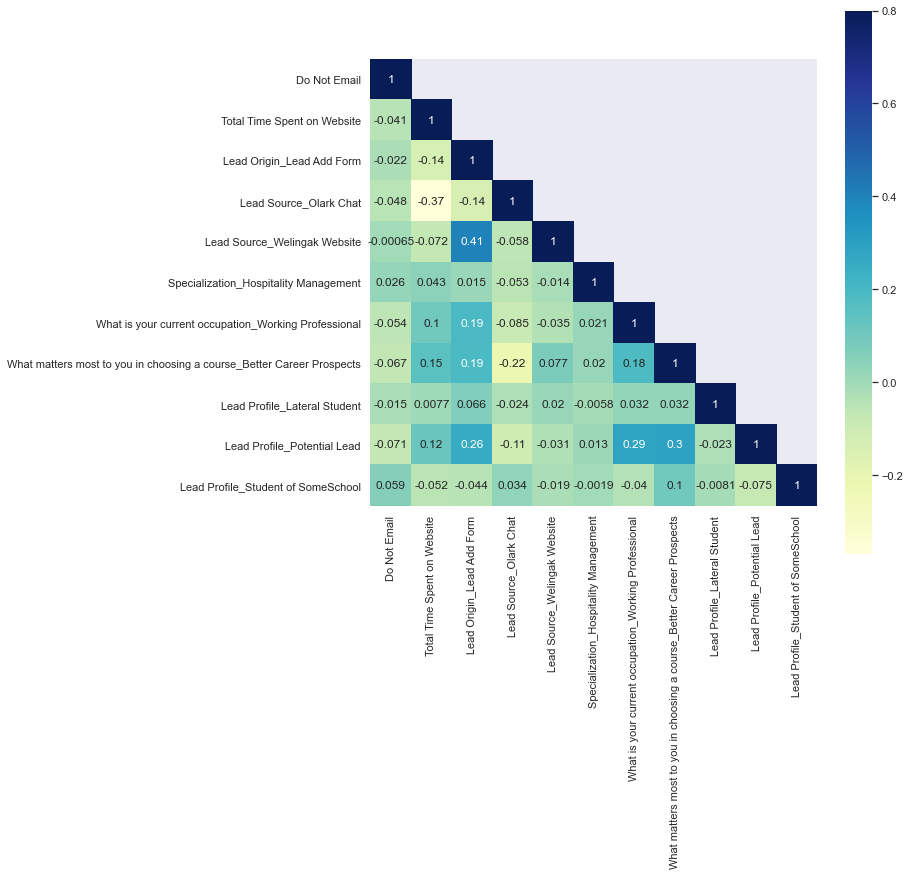

In [174]:
mask = np.array(X_train[rfe_col].corr())
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(X_train[rfe_col].corr(), mask=mask, vmax=0.8, square=True, annot=True,cmap='YlGnBu')
plt.show()

The correlation between features seems to be fine

##### The p-value and VIFs are under control. This is our final model after five Iterations

In [175]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [176]:
# Let's check the overall accuracy.
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
acc

0.8038033395176253

The overall accuracy is 80.38% in Iteration 5. This is approx. same as previous Iteration

## Metrics beyond simply accuracy

In [177]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3543  459]
 [ 810 1656]]


In [178]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [179]:
# Let's see the sensitivity of our logistic regression model
sensi = round(TP / float(TP+FN),2)
sensi

0.67

In [180]:
# Let us calculate specificity
speci = round(TN / float(TN+FP),2)
speci

0.89

In [181]:
# Calculate false postive rate - predicting conversion rate when leads have not conversion
FPR = round(FP/ float(TN+FP),2)
FPR

0.11

In [182]:
# positive predictive value 
PPV = round(TP / float(TP+FP),2)
PPV

0.78

In [183]:
# Negative predictive value
NPV = round(TN / float(TN+ FN),2)
NPV

0.81

### Plotting the ROC Curve

In [184]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [185]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

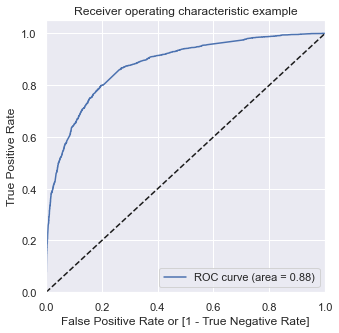

In [186]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [187]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.280037,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.270944,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.324354,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.618990,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.280037,3934,0,1,1,1,0,0,0,0,0,0,0


In [188]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  Accuracy  Sensitivity  Specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.543135     0.980535     0.273613
0.2   0.2  0.745671     0.895377     0.653423
0.3   0.3  0.801484     0.796431     0.804598
0.4   0.4  0.806277     0.736821     0.849075
0.5   0.5  0.803803     0.671533     0.885307
0.6   0.6  0.797155     0.603812     0.916292
0.7   0.7  0.784632     0.516221     0.950025
0.8   0.8  0.756030     0.399432     0.975762
0.9   0.9  0.724335     0.295215     0.988756


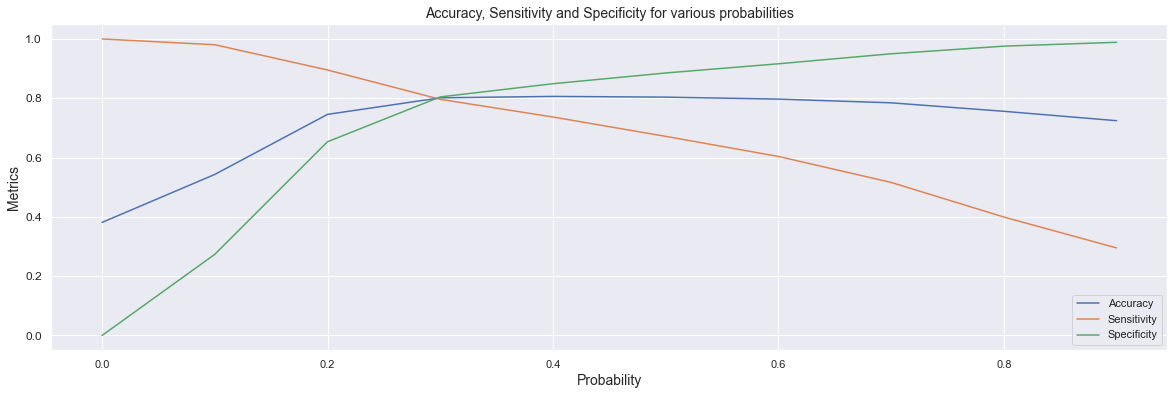

In [189]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['Accuracy','Sensitivity','Specificity'], figsize=(20,6))

##plt.xticks(np.arange(0, 1, step=0.10), size = 12)
plt.yticks(size = 12)
plt.title('Accuracy, Sensitivity and Specificity for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
##plt.vlines(x=0.3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

##### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [190]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.280037,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.270944,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.324354,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.618990,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.280037,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [191]:
# Let's check the overall accuracy.
acc1 = round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)
acc1

0.8

In [192]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3220,  782],
       [ 502, 1964]], dtype=int64)

In [193]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [194]:
# Let's see the sensitivity of our logistic regression model
sensi1 = round(TP / float(TP+FN),2)
sensi1

0.8

In [195]:
# Let us calculate specificity
speci1 = round(TN / float(TN+FP),2)
speci1

0.8

In [196]:
# Calculate false positive rate - predicting conversion rate when leads have not converted
FPR1 = round(FP/ float(TN+FP),2)
FPR1

0.2

In [197]:
# Positive predictive value 
PPV1 = round(TP / float(TP+FP),2)
PPV1

0.72

In [198]:
# Negative predictive value
NPV1 = round(TN / float(TN+ FN),2)
NPV1

0.87

## Precision and Recall

In [199]:
#Looking at the confusion matrix again
confusion2

array([[3220,  782],
       [ 502, 1964]], dtype=int64)

In [200]:
# Precision
#TP / TP + FP
pre1 = round(confusion2[1,1]/(confusion2[0,1]+confusion2[1,1]),2)
pre1

0.72

In [201]:
# Recall
#TP / TP + FN
rec1 = round(confusion2[1,1]/(confusion2[1,0]+confusion2[1,1]),2)
rec1

0.8

### Using sklearn utilities for the same

In [202]:
from sklearn.metrics import precision_score, recall_score

In [203]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7152221412964311

In [204]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7964314679643146

### Precision and recall tradeoff

In [205]:
from sklearn.metrics import precision_recall_curve

In [206]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

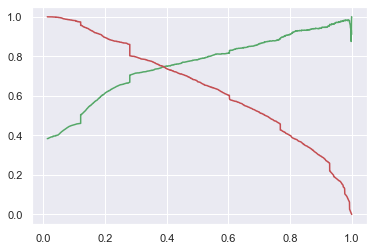

In [207]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [208]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.280037,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.270944,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.324354,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.618990,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.280037,3934,0,1,1,1,0,0,0,0,0,0,0,0


### Lead Conversion percentage on Train dataset

In [209]:
# checking if ~80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_train_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
ld_conv1 = round(checking_train_df['final_predicted'].value_counts()[1]/float((checking_train_df['final_predicted'].value_counts()[0]+checking_train_df['final_predicted'].value_counts()[1])),2)

print('The Lead Conversion percentage on Train dataset is :', ld_conv1)

The Lead Conversion percentage on Train dataset is : 0.8


## Making predictions on the test set

In [210]:
X_test[['TotalVisits', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website']])

In [211]:
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [212]:
X_test = X_test[rfe_col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
4269,0,0.444982,0,0,0,0,0,0,0,0,0
2376,0,0.000000,1,0,0,0,0,1,0,0,0
7766,0,0.025968,0,0,0,0,1,1,0,0,0
9199,0,0.000000,0,1,0,0,0,1,0,1,0
4359,0,0.000000,1,0,0,0,0,1,0,1,0


In [213]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [214]:
y_test_pred = res.predict(X_test_sm)

In [215]:
# Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)

In [216]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1
...,...
8649,0
2152,1
7101,0
5331,0


In [217]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [218]:
# Removing index for both dataframes to append them side by side 
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [219]:
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [220]:
y_test_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.270643
1,1,2376,0.768331
2,1,7766,0.624386
3,0,9199,0.603008
4,1,4359,0.928322


In [221]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [222]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [223]:
y_test_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,1,4269,0.270643,0
1,1,2376,0.768331,1
2,1,7766,0.624386,1
3,0,9199,0.603008,1
4,1,4359,0.928322,1


In [224]:
# Let's check the overall accuracy.
acc2 = round(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted),2)
acc2

0.8

In [225]:
confusion21 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion21

array([[1363,  314],
       [ 228,  867]], dtype=int64)

In [226]:
TP = confusion21[1,1] # true positive 
TN = confusion21[0,0] # true negatives
FP = confusion21[0,1] # false positives
FN = confusion21[1,0] # false negatives

In [227]:
# Let's see the sensitivity of our logistic regression model
sensi2 = round(TP / float(TP+FN),2)
sensi2

0.79

In [228]:
# Let us calculate specificity
speci2 = round(TN / float(TN+FP),2)
speci2

0.81

In [229]:
# Calculate false positive rate - predicting conversion rate when leads have not converted
FPR2 = round(FP/ float(TN+FP),2)
FPR2

0.19

In [230]:
# Positive predictive value 
PPV2 = round(TP / float(TP+FP),2)
PPV2

0.73

In [231]:
# Negative predictive value
NPV2 = round(TN / float(TN+ FN),2)
NPV2

0.86

In [232]:
# Precision
#TP / TP + FP
pre2 = round(confusion21[1,1]/(confusion21[0,1]+confusion21[1,1]),2)
pre2

0.73

In [233]:
# Recall
#TP / TP + FN
rec2 = round(confusion21[1,1]/(confusion21[1,0]+confusion21[1,1]),2)
rec2

0.79

### Lead Conversion percentage on Test dataset

In [234]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_test_pred_final.loc[y_test_pred_final['Converted']==1,['Converted','final_predicted']]
ld_conv2 = round(checking_test_df['final_predicted'].value_counts()[1]/float((checking_test_df['final_predicted'].value_counts()[0]+checking_test_df['final_predicted'].value_counts()[1])),2)

print('The Lead Conversion percentage on Test dataset is :', ld_conv2)



The Lead Conversion percentage on Test dataset is : 0.79


## Lead Score

In [235]:
# Assign a Lead score based on the predictions on Train dataset

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.280037,1871,0,1,1,1,0,0,0,0,0,0,0,0,28
1,0,0.270944,6795,0,1,1,1,0,0,0,0,0,0,0,0,27
2,0,0.324354,3516,0,1,1,1,1,0,0,0,0,0,0,1,32
3,0,0.618990,8105,1,1,1,1,1,1,1,1,0,0,0,1,62
4,0,0.280037,3934,0,1,1,1,0,0,0,0,0,0,0,0,28


In [236]:
# Assign a Lead score based on the predictions on Test dataset

y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_test_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted,Lead_Score
0,1,4269,0.270643,0,27
1,1,2376,0.768331,1,77
2,1,7766,0.624386,1,62
3,0,9199,0.603008,1,60
4,1,4359,0.928322,1,93


### Assigning the Lead score for each Lead Number

In [237]:
# Create Dataset with y_train Prospect ID and Lead score
y_train_score = y_train_pred_final[['Lead Number','Lead_Score']]

# Create Dataset with y_test Prospect ID and Lead score
y_test_score = y_test_pred_final[['Lead Number','Lead_Score']]

# Concatenate the y_train scores and the y_test scores
ld_score = pd.concat([y_train_score, y_test_score], ignore_index=True)

# Set the index of the final score dataset as the Lead Number to concatenate the score dataset to the original data
ld_score.set_index('Lead Number', inplace=True)

# Inner Join the Original Leads dataset with the scores dataset. This will add a new column 'Lead_Score' to the 
# Original dataset. 
lead_orig = lead_orig.join(ld_score['Lead_Score'])

lead_orig.head()



,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,28
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,35
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,92
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,21
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,71


## Determining Important Features

##### Selecting the coefficients of the selected features from our final model excluding the intercept

In [238]:
res.params[1:].sort_values(ascending=False)

Total Time Spent on Website                                              4.510669
Lead Origin_Lead Add Form                                                3.155602
Lead Source_Welingak Website                                             2.548142
What is your current occupation_Working Professional                     2.347765
Lead Profile_Lateral Student                                             2.321781
Lead Profile_Potential Lead                                              1.362290
What matters most to you in choosing a course_Better Career Prospects    1.041837
Lead Source_Olark Chat                                                   1.012415
Specialization_Hospitality Management                                   -0.875781
Do Not Email                                                            -1.201757
Lead Profile_Student of SomeSchool                                      -2.498673
dtype: float64

In [239]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [240]:
predict1 = res.params[1:]
predict1 = 100.0 * (predict1 / predict1.max())
predict1.sort_values(ascending=False)

Total Time Spent on Website                                              100.000000
Lead Origin_Lead Add Form                                                 69.958628
Lead Source_Welingak Website                                              56.491443
What is your current occupation_Working Professional                      52.049145
Lead Profile_Lateral Student                                              51.473087
Lead Profile_Potential Lead                                               30.201515
What matters most to you in choosing a course_Better Career Prospects     23.097181
Lead Source_Olark Chat                                                    22.444905
Specialization_Hospitality Management                                    -19.415769
Do Not Email                                                             -26.642543
Lead Profile_Student of SomeSchool                                       -55.394727
dtype: float64

In [241]:
# Sort the feature variables based on their relative coefficient values

sorted_idx = np.argsort(predict1,kind='quicksort',order='list of str')
sorted_idx.sort_values(ascending=False)

Do Not Email                                                             10
Specialization_Hospitality Management                                     9
What is your current occupation_Working Professional                      8
Lead Source_Welingak Website                                              7
What matters most to you in choosing a course_Better Career Prospects     6
Lead Origin_Lead Add Form                                                 5
Lead Profile_Lateral Student                                              4
Lead Source_Olark Chat                                                    3
Lead Profile_Potential Lead                                               2
Lead Profile_Student of SomeSchool                                        1
Total Time Spent on Website                                               0
dtype: int64

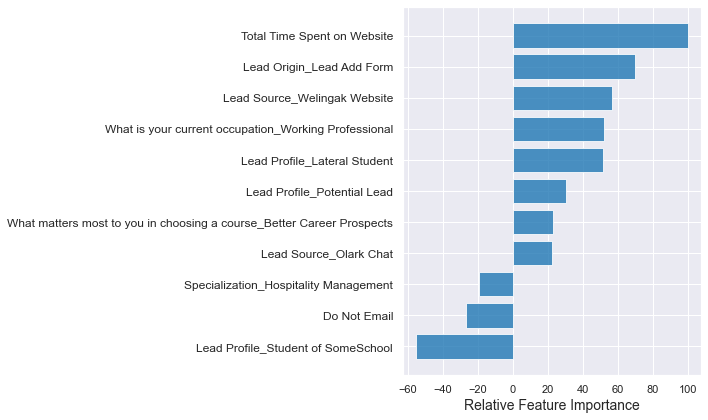

In [242]:
# Plot to show the realtive Importance of each feature in the model 
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(pos, predict1[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[rfe_col].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### Observation from Train and Test Dataset by taking probability cutoff as "0.3"

### Train Dataset

In [243]:
print ('Metrics from the train Dataset after choosing optimum cut-off: ')
print ('1. Accuracy                  :', acc1)
print ('2. Sensitivity               :', sensi1)
print ('3. Specificity               :', speci1)
print ('4. False Positive Rate       :', FPR1)
print ('5. Positive Predictive Value :', PPV1)
print ('6. Negative Predictive Value :', NPV1)
print ('7. Precision                 :', pre1)
print ('8. Recall                    :', rec1)

Metrics from the train Dataset after choosing optimum cut-off: 
1. Accuracy                  : 0.8
2. Sensitivity               : 0.8
3. Specificity               : 0.8
4. False Positive Rate       : 0.2
5. Positive Predictive Value : 0.72
6. Negative Predictive Value : 0.87
7. Precision                 : 0.72
8. Recall                    : 0.8


### Test Dataset

In [244]:
print ('Metrics from the test Dataset: ')
print ('1. Accuracy                  :', acc2)
print ('2. Sensitivity               :', sensi2)
print ('3. Specificity               :', speci2)
print ('4. False Positive Rate       :', FPR2)
print ('5. Positive Predictive Value :', PPV2)
print ('6. Negative Predictive Value :', NPV2)
print ('7. Precision                 :', pre2)
print ('8. Recall                    :', rec2)

Metrics from the test Dataset: 
1. Accuracy                  : 0.8
2. Sensitivity               : 0.79
3. Specificity               : 0.81
4. False Positive Rate       : 0.19
5. Positive Predictive Value : 0.73
6. Negative Predictive Value : 0.86
7. Precision                 : 0.73
8. Recall                    : 0.79


##### The Metrics values of Train and Test dataset are approx. the same and it almost matching

## Recommendations 

#### X-Education has a better chance of converting into a potential/hot lead when they focus on contacting people who fall into the below feature:

> 1. Total Time Spent on Website
> 2. Lead Origin_Lead Add Form                                                
> 3. Lead Source_Welingak Website                                             
> 4. What is your current occupation_Working Professional                    
> 5. Lead Profile_Lateral Student  


### Conclusion :

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 80% which are approximately closer to 
  the respective values calculated using training  dataset.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be good.   